In [14]:
from lcs import *
import xgi
import numpy as np
import matplotlib.pyplot as plt
import fig_settings as fs
import matplotlib.cm as cm

In [2]:
fs.set_fonts()

In [3]:
el = zkc(format="edgelist")
H = xgi.Hypergraph(el)
A = zkc()
n = A.shape[0]

i = 13
t = 56

In [4]:
gamma = 0.2
b = 0.07
contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)
x0 = np.zeros(n)
x0[0] = 1

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100, random_seed=2)

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:472: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


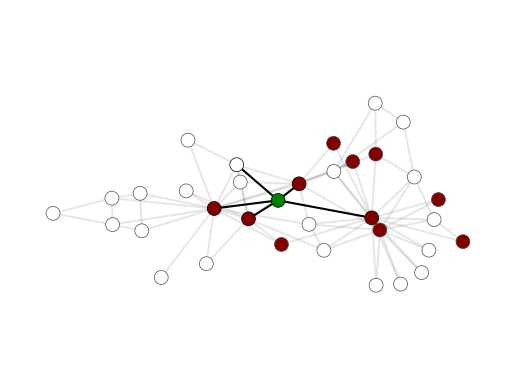

In [18]:
infected_color = "maroon"
susceptible_color = "white"
subgraph_color = "black"
graph_color = (0.1, 0.1, 0.1, 0.1)
subgraph_node_lc = "black"
graph_node_lc = (0.3, 0.3, 0.3)

sg = H.nodes.memberships(i)
nbrs = H.nodes.neighbors(i)
nbrs.add(i)

pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=5, k=0.3))
node_fc = [infected_color if x[t, i] else susceptible_color for i in H.nodes]
node_ec = [subgraph_node_lc if n in nbrs else graph_node_lc for n in H.nodes]
node_fc[12] = "green"

dyad_color = [subgraph_color if e in sg else graph_color for e in H.edges]


xgi.draw(H, pos=pos, node_size=10, node_fc=node_fc, dyad_color=dyad_color, node_ec=node_ec, node_lw=0.5)
plt.savefig("Figures/Fig1/graph.svg", dpi=1000)
plt.show()

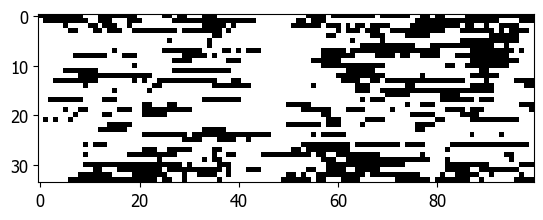

In [19]:
plt.imshow(x.T, cmap=cm.Greys, vmin=0, vmax=1, interpolation=None)
plt.yticks([0, 10, 20, 30])
plt.savefig("Figures/Fig1/x.svg", dpi=1000)
plt.show()

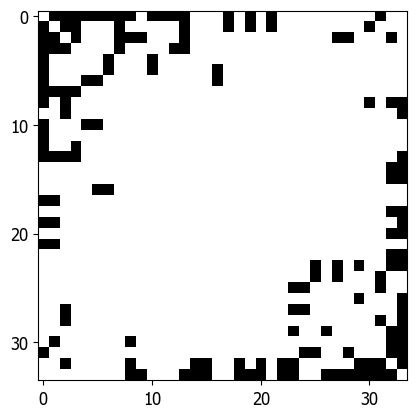

In [20]:
plt.imshow(A, vmin=0, vmax=1, cmap=cm.Greys)
plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])
plt.savefig("Figures/Fig1/a.svg", dpi=1000)
plt.show()